# LATIHAN

In [20]:
import numpy as np
X=np.array([[7,3], [1,10],[5,5], [2,1], [3,3], [2,7], [17,14], [6,8], [7,5], [3,6]])
Y=np.array([1, 1, 1, 2, 2, 2, 1, 2, 1, 1])

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X, Y)
print("fit : ", clf.predict([[-0.8, -1]]))

clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))
print("partial fit : ", clf_pf.predict([[-0.8, -1]]))

fit :  [1]
partial fit :  [1]


(-6.049595199593698,
 7.936607551140524,
 -14.083135218153682,
 3.6706452226739277)

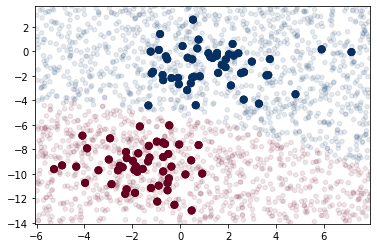

In [19]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
model = GaussianNB()
model.fit(X, y);
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [11]:
import numpy as np
import pandas as pd
from operator import itemgetter
from sklearn.metrics import accuracy_score

def hitungclass(X,Y):
    jumlahkolomx=len(X[0])
    jumlahbarisx=len(X)
    jumlahbarisy=len(Y)
    Xbaru=[]
    Ybaru=[]
    
    for i in range(jumlahkolomx):
        Xbaru.append(np.unique(X[:,i],return_counts=True))
        
    Ybaru=np.unique(Y,return_counts=True)
    likelihood = []
    likelist=[]
    model={}
    
    for i,val in enumerate(X):
        for j in range(jumlahkolomx):
            likelist.append([X[i][j],Y[i]])
    
    likelihood=np.unique(likelist,return_counts=True,axis=0)
    
    for i,val in enumerate(likelihood[0]):
        model[tuple(val)]=likelihood[1][i]
    
    for i,j in zip(Ybaru[0],Ybaru[1]):
        model[str(i)]=j
    
    for i,val in enumerate(Xbaru):
        for j in val[0]:
            for h in Ybaru[0]:
                None
                #print(j,"-",h,"-",model.get((str(j),str(h)))/model.get(str(h)) )
    
    return np.array([model,Ybaru])

def prediksi(proba,kriteria):
    prior={}
    likelihood={}
    listprob={}
    prob={}
    
    #mendapatkan prior
    for i,val in enumerate(proba[1][0]):
        prior[val]=proba[1][1][i]
    
    #mendapatkan likelihood
    for i in kriteria:
        for j in prior:
            name=str(str(i)+str(j))
            likelihood[name]=proba[0].get((i,str(j)))
    
    #mengelompokan likelihood berdasarkan prior
    for i in likelihood:
        for j in prior:
            if(str(i)[-1]==str(j)):
                listprob.setdefault(j,[])
                listprob[j].append(i)
    
    a=1
    hasil=[]
    temp=next(iter(listprob))
    
    #menghitung probabilitas berdasarkan prior
    for i,val in listprob.items():
        for j in val:
            if(i==temp):
                a=a*(likelihood[j]/prior[i])
            else:
                a=1
                a=a*(likelihood[j]/prior[i])
            temp=i
        hasil.append([temp,a])
    
    #print(hasil)
        hasil.sort(key=itemgetter(1),reverse=True)
        
    return hasil
    #return (hasil[0][0])

In [17]:
X=np.array([
            ["laki-laki","organisasi"],
            ["perempuan","tidak"],
            ["laki-laki","tidak"],
            ["perempuan","organisasi"],
            ["laki-laki","organisasi"],
            ["perempuan","tidak"],
            ["laki-laki","tidak"],
            ["perempuan","organisasi"],
            ["laki-laki","ukm"],
            ["perempuan","ukm"],
            ["laki-laki","ukm"],
            ["perempuan","organisasi"],
            ["laki-laki","organisasi"]
            ])

Xtest=X
Xhasil=[]
Y=np.array([1,0,1,1,1,1,0,1,1,1,0,1,0])
proba=hitungclass(X,Y)

print("Menggunakan Fungsi Buatan")
print("Laki-laki organisasi",prediksi(proba,["laki-laki","organisasi"])[0][0])
print("Laki-laki ukm",prediksi(proba,["laki-laki","ukm"])[0][0])
print("Laki-laki tidak",prediksi(proba,["laki-laki","tidak"])[0][0])
print("perempuan organisasi",prediksi(proba,["perempuan","organisasi"])[0][0])
print("perempuan ukm",prediksi(proba,["perempuan","ukm"])[0][0])
print("perempuan tidak",prediksi(proba,["perempuan","tidak"])[0][0])
print("")
for i in Xtest:
    Xhasil.append(prediksi(proba,i)[0][0])
print("Hasil asli",Y)
print("Hasil prediksi",Xhasil)
print("Akurasi :",accuracy_score(Y,Xhasil))


print("\nMenggunakan Fungsi scikit dengan mengubah nominal menjadi numeric")
cleanup_nums = {0:     {"laki-laki": 1, "perempuan": 0},
                1: {"tidak": 0, "ukm": 1, "organisasi": 2 }}
b=pd.DataFrame(X)
b.replace(cleanup_nums, inplace=True)
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(b, Y)
btest=b
bhasil=[]

print("Laki-laki organisasi",clf.predict([[1,2]]))
print("Laki-laki ukm",clf.predict([[1,1]]))
print("Laki-laki tidak",clf.predict([[1,0]]))
print("perempuan organisasi",clf.predict([[0,2]]))
print("perempuan ukm",clf.predict([[0,1]]))
print("perempuan tidak",clf.predict([[0,0]]))
print("")
for i,val in enumerate(btest.values):
    bhasil.append(clf.predict([val])[0])
print("Hasil asli",Y)
print("Hasil prediski scikit",bhasil)
print("Akurasi :",accuracy_score(Y,bhasil))

Menggunakan Fungsi Buatan
Laki-laki organisasi 1
Laki-laki ukm 0
Laki-laki tidak 0
perempuan organisasi 1
perempuan ukm 1
perempuan tidak 0

Hasil asli [1 0 1 1 1 1 0 1 1 1 0 1 0]
Hasil prediksi [1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
Akurasi : 0.6923076923076923

Menggunakan Fungsi scikit dengan mengubah nominal menjadi numeric
Laki-laki organisasi [1]
Laki-laki ukm [1]
Laki-laki tidak [0]
perempuan organisasi [1]
perempuan ukm [1]
perempuan tidak [1]

Hasil asli [1 0 1 1 1 1 0 1 1 1 0 1 0]
Hasil prediski scikit [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
Akurasi : 0.6923076923076923


Nomor 1 Proses training membutuhkan memori, fungsi fit mentraining semua data
	sedangkan partial_fit umumnya digunakan untuk
	training dengan ukuran data yang besar sehingga
	data training dipecah menjadi beberapa bagian yang
	lebih kecil, sehingga tidak membebani memori
Nomor 3 Menggunakan Dictionary karena dapat mengakses value dengan key,
	fungsi bayes dengan tipedata nominal
Nomor 4 Hasil akurasi sebesar 0.6923076923076923
Nomor 5 Kesimpulan NaiveBayes buatan sendiri: hanya untuk data yang berbentuk nominal bukan numerik,
	tidak bisa untuk label/Y/ yang banyak, maksimal 1 karakter 10(0-9) atau 27(a-z) karena
	menggunakan str()[-1] untuk mengelompokan likelihood ke prior/ Sedangkan
	bayes bawaan scikit (gausian,multinominal,bernouli) untuk tipedata numerik sehingga
	saya harus dirubah menjadi numerik, hasil akurasi buatan sendiri dan fungsi scikit hasilnya sama 0.69